In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import astropy.coordinates as coord

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import QTable
from astropy.io import fits
from astropy.table import Table

In [2]:
elb_path = 'files/all_columns_catalog.fits'

def Table_to_pandas(fn):
    data = fits.open(fn)
    df = QTable(data[1].data)
    cols = []
    cols_drop = []
    for i in df.columns:
        #print(boss_mwm[i][0])
        if np.size(df[i][0])==1:
            cols.append(i)
        else:
            cols_drop.append(i)
    print(cols_drop)
    return df[cols].to_pandas()

df_binaries = Table_to_pandas(elb_path)
print(list(df_binaries))

[]
['solution_id1', 'solution_id2', 'source_id1', 'source_id2', 'random_index1', 'random_index2', 'ref_epoch1', 'ref_epoch2', 'ra1', 'ra2', 'ra_error1', 'ra_error2', 'dec1', 'dec2', 'dec_error1', 'dec_error2', 'parallax1', 'parallax2', 'parallax_error1', 'parallax_error2', 'parallax_over_error1', 'parallax_over_error2', 'pm1', 'pm2', 'pmra1', 'pmra2', 'pmra_error1', 'pmra_error2', 'pmdec1', 'pmdec2', 'pmdec_error1', 'pmdec_error2', 'ra_dec_corr1', 'ra_dec_corr2', 'ra_parallax_corr1', 'ra_parallax_corr2', 'ra_pmra_corr1', 'ra_pmra_corr2', 'ra_pmdec_corr1', 'ra_pmdec_corr2', 'dec_parallax_corr1', 'dec_parallax_corr2', 'dec_pmra_corr1', 'dec_pmra_corr2', 'dec_pmdec_corr1', 'dec_pmdec_corr2', 'parallax_pmra_corr1', 'parallax_pmra_corr2', 'parallax_pmdec_corr1', 'parallax_pmdec_corr2', 'pmra_pmdec_corr1', 'pmra_pmdec_corr2', 'astrometric_n_obs_al1', 'astrometric_n_obs_al2', 'astrometric_n_obs_ac1', 'astrometric_n_obs_ac2', 'astrometric_n_good_obs_al1', 'astrometric_n_good_obs_al2', 'astrome

In [3]:
df = df_binaries[['source_id1','source_id2','sep_AU','phot_rp_mean_mag1','phot_rp_mean_mag2',\
    'phot_bp_mean_mag1','phot_bp_mean_mag2','phot_g_mean_mag1','phot_g_mean_mag2']]

df['delta_gmag'] = np.abs(df['phot_g_mean_mag1']-df['phot_g_mean_mag2'])
df['delta_bprp'] = np.abs((df['phot_bp_mean_mag1']-df['phot_rp_mean_mag1'])-\
    (df['phot_bp_mean_mag2']-df['phot_rp_mean_mag2']))

# nelson+2021 twin conditions
df = df[df['delta_gmag']<0.5]
df = df[df['delta_bprp']<0.1]

/var/folders/tg/13dnkqt55n5b0_hjm82hxyd40000gq/T/ipykernel_7250/743847497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_gmag'] = np.abs(df['phot_g_mean_mag1']-df['phot_g_mean_mag2'])
/var/folders/tg/13dnkqt55n5b0_hjm82hxyd40000gq/T/ipykernel_7250/743847497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_bprp'] = np.abs((df['phot_bp_mean_mag1']-df['phot_rp_mean_mag1'])-\


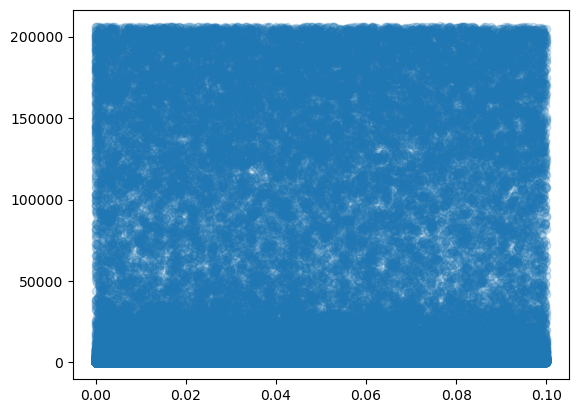

In [4]:
plt.plot(df['delta_bprp'],df['sep_AU'],'o',alpha=0.2)
plt.show()


37       -1.2690
64       -0.2898
74       -0.0905
87       -0.0992
91        0.2691
           ...  
118942   -0.4015
118943   -0.1906
118981    0.0230
119046   -0.4295
119122   -0.5461
Name: mh_gspphot1, Length: 3854, dtype: float64
37       -0.9990
64       -0.0642
74       -0.1628
87       -0.5717
91        0.2275
           ...  
118942   -0.8488
118943   -0.2016
118981   -0.4628
119046   -0.1223
119122   -0.4522
Name: mh_gspphot2, Length: 3854, dtype: float64


/var/folders/tg/13dnkqt55n5b0_hjm82hxyd40000gq/T/ipykernel_7250/875425288.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mh_final['delta_mh_gspphot'] = np.abs(df_mh_final['mh_gspphot1']-df_mh_final['mh_gspphot2'])


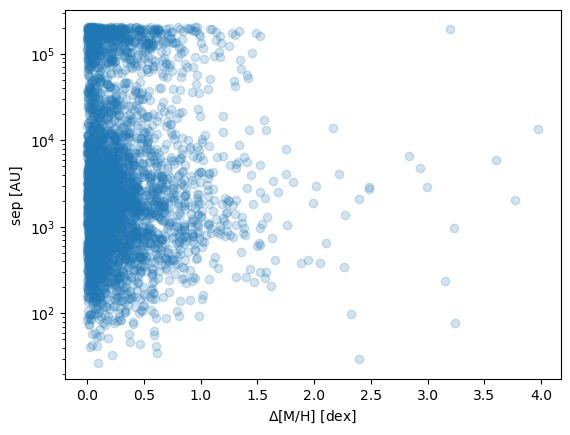

In [6]:
df_mh1 = pd.read_csv('files/test1_mh.csv',index_col=False)
df_mh2 = pd.read_csv('files/test2_mh.csv',index_col=False)

test = pd.merge(df,df_mh1,on='source_id1')
test = test[['source_id1','mh_gspphot','mh_gspphot_lower','mh_gspphot_upper']]
test2 = pd.merge(df,df_mh2,on='source_id2')
test2 = test2[['source_id2','mh_gspphot','mh_gspphot_lower','mh_gspphot_upper']]

df['mh_gspphot1'] = test['mh_gspphot']
df['mh_gspphot_lower1'] = test['mh_gspphot_lower']
df['mh_gspphot_upper1'] = test['mh_gspphot_upper']

df['mh_gspphot2'] = test2['mh_gspphot']
df['mh_gspphot_lower2'] = test2['mh_gspphot_lower']
df['mh_gspphot_upper2'] = test2['mh_gspphot_upper']

df_mh_final = df.dropna(subset=['mh_gspphot1','mh_gspphot2'])
print(df_mh_final['mh_gspphot1'])
print(df_mh_final['mh_gspphot2'])

df_mh_final['delta_mh_gspphot'] = np.abs(df_mh_final['mh_gspphot1']-df_mh_final['mh_gspphot2'])
plt.plot(df_mh_final['delta_mh_gspphot'],df_mh_final['sep_AU'],'o',alpha=0.2)
plt.xlabel(r'$\Delta$[M/H] [dex]')
plt.ylabel(r'sep [AU]')
plt.yscale("log")
plt.show()